# Examples of Using MultiIndex
## Copyright (C) Princeton Consultants, 2017-2018
### Import pandas library

In [1]:
import pandas as pd

### Create a MultiIndex from the cross-product of lists

In [2]:
mi1 = pd.MultiIndex.from_product([['a','b','c'],[1,2]])
list(mi1)

[('a', 1), ('a', 2), ('b', 1), ('b', 2), ('c', 1), ('c', 2)]

### Create a MultiIndex from a list of tuples

In [3]:
mi2 = pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2), ('c', 1), ('c', 2)])
list(mi2)

[('a', 1), ('a', 2), ('b', 1), ('b', 2), ('c', 1), ('c', 2)]

### Create a MultiIndex from pairs deriving from parallel arrays

In [4]:
mi3 = pd.MultiIndex.from_arrays([['a','a','b','b','c','c'],[1,2,1,2,1,2]])
list(mi3)

[('a', 1), ('a', 2), ('b', 1), ('b', 2), ('c', 1), ('c', 2)]

### Create a MultiIndex representing a network

In [5]:
mi4 = pd.MultiIndex.from_tuples([('n1','n2'),('n1','n3'),('n2','n4'),('n3','n4'),('n2','n3'),('n4','n1')], names=['from','to'])
list(mi4)

[('n1', 'n2'),
 ('n1', 'n3'),
 ('n2', 'n4'),
 ('n3', 'n4'),
 ('n2', 'n3'),
 ('n4', 'n1')]

### Create some Series to show indexing

In [6]:
s1 = pd.Series(range(6),index=mi1)
s1

a  1    0
   2    1
b  1    2
   2    3
c  1    4
   2    5
dtype: int64

In [7]:
s4 = pd.Series(range(6), index=mi4)
s4

from  to
n1    n2    0
      n3    1
n2    n4    2
n3    n4    3
n2    n3    4
n4    n1    5
dtype: int64

### Get slices by first and second dimension

In [8]:
s1['a']

1    0
2    1
dtype: int64

In [9]:
s1[:,2]

a    1
b    3
c    5
dtype: int64

### Get the arcs with first label = n1, and then n2

In [10]:
s4['n1']

to
n2    0
n3    1
dtype: int64

In [11]:
s4['n2']

to
n4    2
n3    4
dtype: int64

### Get the arcs with second label = n3

In [12]:
s4[:,'n3']

from
n1    1
n2    4
dtype: int64

### Draw the network

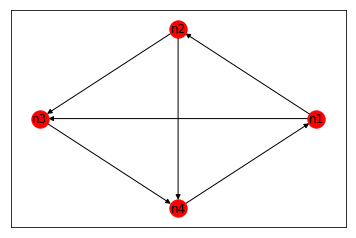

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.DiGraph()
G.add_edges_from(list(mi4))
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, ax=None)
nx.draw_networkx_edges(G, pos, ax=None)
nx.draw_networkx_labels(G, pos, labels={node:node for node in G.nodes()}, ax=None)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()